## System setup

---


##### Importing modules


In [1]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import (
    TensorBoard,
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau
)

from toolkit.classes import DataSet, ImageProcessor, Augmenter, Model

2023-01-15 09:24:41.652749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-15 09:24:42.170631: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-15 09:24:42.170657: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-15 09:24:43.883846: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Read dataset

---


##### Create image dataframe


In [2]:
images = DataSet()

In [3]:
datasets = ["raw", "data", "augmented", "preprocessed"]
for dataset in datasets:
    images.update_dataset(dataset=dataset)


Found 150 images in ./raw/Train/Non defective/
Found 150 images in ./raw/Train/Defective/
Found 31 images in ./raw/Validation/Non defective/
Found 31 images in ./raw/Validation/Defective/
Found 11 images in ./raw/Test/Non defective/
Found 11 images in ./raw/Test/Defective/
Found 150 images in ./data/Train/Non defective/
Found 150 images in ./data/Train/Defective/
Found 31 images in ./data/Validation/Non defective/
Found 31 images in ./data/Validation/Defective/
Found 11 images in ./data/Test/Non defective/
Found 11 images in ./data/Test/Defective/
Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/
Found 175 images in ./preprocessed/Train/Non defective/
Found 175 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


## Data augmentation

---


In [ ]:
N_augmented = 25

image_augmenter = Augmenter(N_augmented, images.data)
image_augmenter.remove_old_data(images.augmented_folder)
image_augmenter.augment_images()
del image_augmenter
images.update_dataset("augmented")
images.augmented


100%|██████████| 25/25 [00:08<00:00,  3.08it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


,type,defect,defect_str,path,filename,img,height,width,components,R_mean,G_mean,B_mean
0,train,0,Non defective,./augmented/Train/Non defective/,75_augmented.jpg,./augmented/Train/Non defective/75_augmented.jpg,0,0,0,0.0,0.0,0.0
1,train,0,Non defective,./augmented/Train/Non defective/,29_augmented.jpg,./augmented/Train/Non defective/29_augmented.jpg,0,0,0,0.0,0.0,0.0
2,train,0,Non defective,./augmented/Train/Non defective/,14_augmented.jpg,./augmented/Train/Non defective/14_augmented.jpg,0,0,0,0.0,0.0,0.0
3,train,0,Non defective,./augmented/Train/Non defective/,56_augmented.jpg,./augmented/Train/Non defective/56_augmented.jpg,0,0,0,0.0,0.0,0.0
4,train,0,Non defective,./augmented/Train/Non defective/,112_augmented.jpg,./augmented/Train/Non defective/112_augmented.jpg,0,0,0,0.0,0.0,0.0
5,train,0,Non defective,./augmented/Train/Non defective/,39_augmented.jpg,./augmented/Train/Non defective/39_augmented.jpg,0,0,0,0.0,0.0,0.0
6,train,0,Non defective,./augmented/Train/Non defective/,7_augmented.jpg,./augmented/Train/Non defective/7_augmented.jpg,0,0,0,0.0,0.0,0.0
7,train,0,Non defective,./augmented/Train/Non defective/,33_augmented.jpg,./augmented/Train/Non defective/33_augmented.jpg,0,0,0,0.0,0.0,0.0
8,train,0,Non defective,./augmented/Train/Non defective/,63_augmented.jpg,./augmented/Train/Non defective/63_augmented.jpg,0,0,0,0.0,0.0,0.0
9,train,0,Non defective,./augmented/Train/Non defective/,140_augmented.jpg,./augmented/Train/Non defective/140_augmented.jpg,0,0,0,0.0,0.0,0.0


## Image processing

---


In [4]:
img_height = 32
img_width = 32

preprocessing_steps = [
    "original",
    "grayscale",
    "hist_eq",
    "noise_filt",
    "resize",
    "save",
]

preprocessing_kwargs = {
    "crop": {"ratio": 0.1},
    "resize": {"height": img_height, "width": img_width},
    "hist_eq": {
        "type": "CLAHE",
        "size": (16, 16),
    },
    "noise_filt": {"type": "median", "size": 11},
    "Laplacian": {"size": 5},
    "Canny": {"low": 100, "high": 200},
    "Hough": {"minLineLength": 10, "maxLineGap": 20},
    "feat_detect": {"type": "ORB"},
}


In [5]:
image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs)
image_processor.remove_old_data(images.preprocessed_folder)
image_processor.process_images(images.data)
image_processor.process_images(images.augmented)
del image_processor

384it [08:04,  1.26s/it]
50it [01:02,  1.26s/it]


## Model build

---


##### Construct neural network


In [93]:
CNN = Model("LeNet-5")

CNN.epochs = 1000
CNN.batch_size = 32

CNN.optimizer = Adam(
    learning_rate=0.0001
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
    EarlyStopping(
        monitor="val_accuracy",
        patience=50,
        verbose=1,
        mode="auto",
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=2,
        verbose=1,
        mode="auto",
        min_lr=0.000005
    )
]

CNN.load_datasets()
CNN.build_model()
CNN.compile_model()
CNN.model.summary()

Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_30 (Rescaling)    (None, 32, 32, 1)         0         
                                                                 
 conv2d_60 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_60 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_61 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_61 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
 

##### Train


In [94]:
CNN.train_net()

Epoch 1/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.6942 - accuracy: 0.5234 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/LeNet-5.h5
11/11 [==============================] - 4s 25ms/step - loss: 0.6944 - accuracy: 0.5086 - val_loss: 0.6903 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.6961 - accuracy: 0.5089
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 0s 11ms/step - loss: 0.6980 - accuracy: 0.4943 - val_loss: 0.6901 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.6981 - accuracy: 0.4805
Epoch 3: val_accuracy improved from 0.50000 to 0.51613, saving model to ./models/LeNet-5.h5
11/11 [==============================] - 0s 13ms/step - loss: 0.7004 - accuracy: 0.4686 - val_loss: 0.6932 - val_accuracy: 0.5161 - lr: 1.0000e-04
Epoch 4/1000
 8/11 [==================

##### Predict


In [95]:
CNN.predict_test()


1/1 [==============================] - 0s 137ms/step
Test values:          [1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0]
Predicted values:     [1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0]


##### Metrics


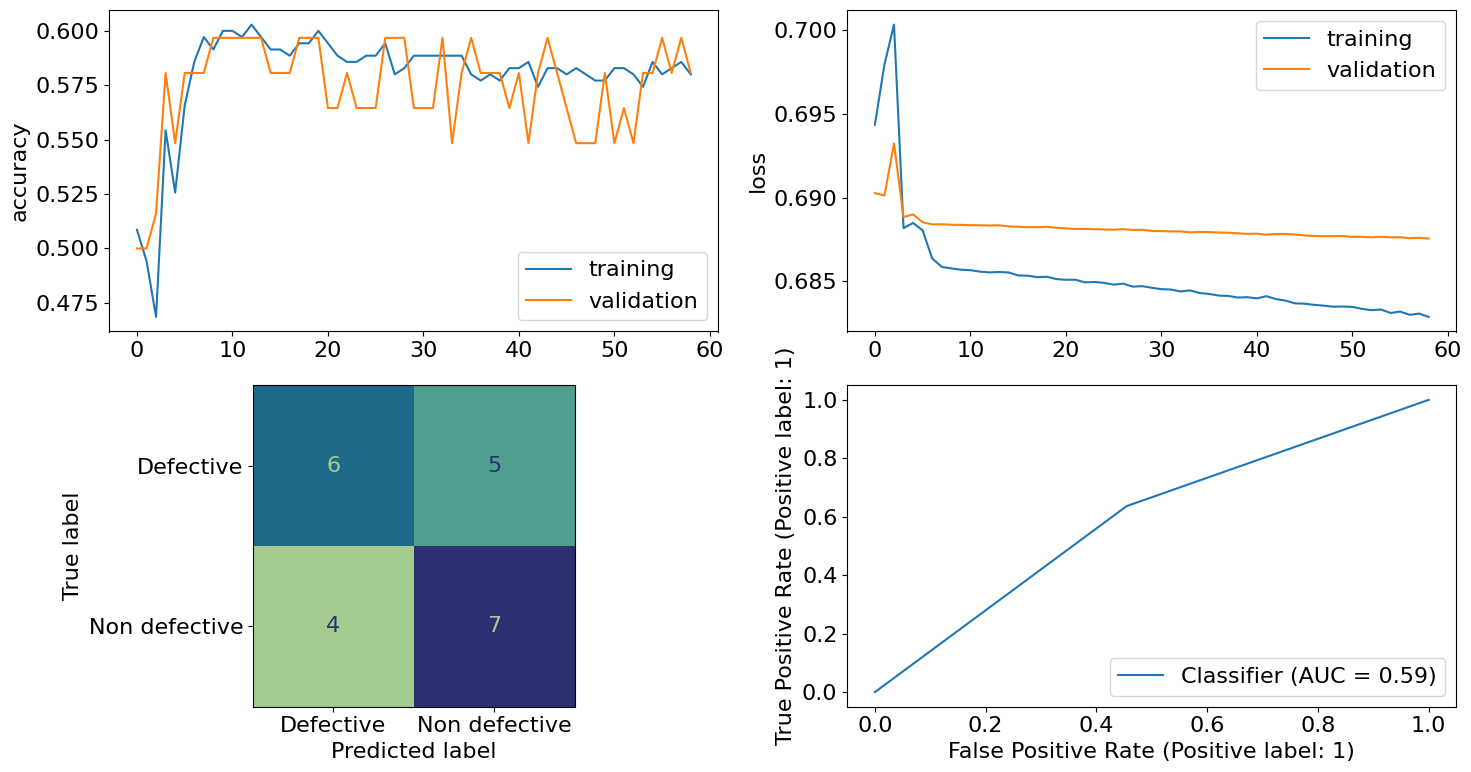

In [96]:
CNN.show_metrics(save_folder=images.plot_folder)


#### Run with tuned learning rate

2023-01-15 09:36:03.726287: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-15 09:36:03.726343: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tomcom): /proc/driver/nvidia/version does not exist
2023-01-15 09:36:03.728451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Epoch 1/100
 7/11 [==================>...........] - ETA: 0s - loss: 0.7013 - accuracy: 0.4554 
Epoch 1: val_accuracy improved from -inf to 0.51613, saving model to ./models/LeNet-5_LR.h5
11/11 [==============================] - 2s 36ms/step - loss: 0.6991 - accuracy: 0.4771 - val_loss: 0.6921 - val_accuracy: 0.5161
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5171
Epoch 2: val_accuracy improved from 0.51613 to 0.53226, saving model to ./models/LeNet-5_LR.h5
11/11 [==============================] - 0s 19ms/step - loss: 0.6921 - accuracy: 0.5171 - val_loss: 0.6920 - val_accuracy: 0.5323
Epoch 3/100
 6/11 [===============>..............] - ETA: 0s - loss: 0.6919 - accuracy: 0.5521
Epoch 3: val_accuracy improved from 0.53226 to 0.54839, saving model to ./models/LeNet-5_LR.h5
11/11 [==============================] - 0s 17ms/step 

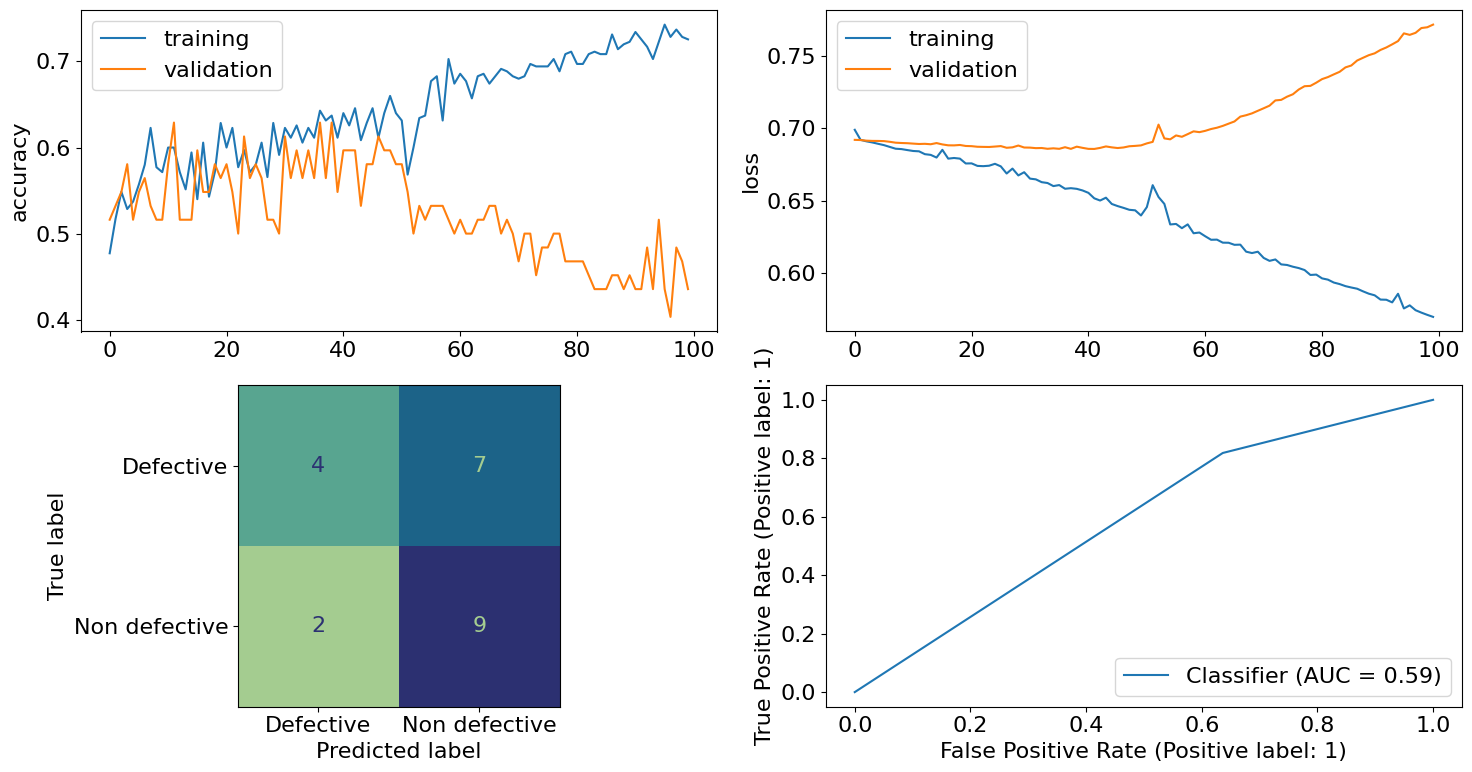

In [6]:
CNN = Model("LeNet-5")

CNN.epochs = 100
CNN.batch_size = 32

CNN.optimizer = Adam(
    learning_rate=0.00010406121816929997
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}_LR.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
]

CNN.load_datasets()
CNN.build_model()
CNN.compile_model()
CNN.train_net()
CNN.model.load_weights('./models/LeNet-5_LR.h5')
CNN.predict_test()
CNN.show_metrics(save_folder=images.plot_folder, postfix='LR')